## Task 29

### Instantiating The VGG16 Convolutional Base

In [1]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                    include_top=False,
                    input_shape=(150, 150, 3))

conv_base.summary()

58889256/58889256 [==============================] - 65s 1us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                             

### Extracting Features Using The Pretrained Convolutional Base

In [3]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir='cats_and_dogs_small/cats_and_dogs_small/'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
test_dir=os.path.join(base_dir,'test')

datagen=ImageDataGenerator(rescale=1./255)
batch_size=20

def extract_features(directory,sample_count):
    features=np.zeros(shape=(sample_count,4,4,512))
    labels=np.zeros(shape=(sample_count))
    generator=datagen.flow_from_directory(directory,target_size=(150,150),batch_size=batch_size,class_mode='binary')
    i=0
    for inputs_batch,labels_batch in generator:
        features_batch=conv_base.predict(inputs_batch)
        features[i*batch_size:(i+1)*batch_size]=features_batch
        labels[i*batch_size:(i+1)*batch_size]=labels_batch
        i+=1
        if i*batch_size>=sample_count:
            break
    return features,labels

train_features,train_labels=extract_features(train_dir,2000)
validation_features,validation_labels=extract_features(validation_dir,1000)
test_features,test_labels=extract_features(test_dir,1000)

train_features=np.reshape(train_features,(2000,4*4*512))
validation_features=np.reshape(validation_features,(1000,4*4*512))
test_features=np.reshape(test_features,(1000,4*4*512))

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 1s 1s/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 1s/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 1s/step


### Defining and Training The Densely Connected Classifier

In [5]:
from keras import models
from keras import layers
from keras import optimizers

model=models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),loss='binary_crossentropy',metrics=['acc'])

history=model.fit(train_features,train_labels,epochs=30,batch_size=20,validation_data=(validation_features,validation_labels))

Epoch 1/30
100/100 [==============================] - 5s 43ms/step - loss: 0.5830 - acc: 0.6980 - val_loss: 0.4452 - val_acc: 0.8270
Epoch 2/30
100/100 [==============================] - 4s 41ms/step - loss: 0.4238 - acc: 0.8150 - val_loss: 0.3719 - val_acc: 0.8380
Epoch 3/30
100/100 [==============================] - 4s 41ms/step - loss: 0.3543 - acc: 0.8550 - val_loss: 0.3211 - val_acc: 0.8740
Epoch 4/30
100/100 [==============================] - 4s 41ms/step - loss: 0.3157 - acc: 0.8670 - val_loss: 0.3121 - val_acc: 0.8680
Epoch 5/30
100/100 [==============================] - 4s 38ms/step - loss: 0.2850 - acc: 0.8850 - val_loss: 0.2835 - val_acc: 0.8970
Epoch 6/30
100/100 [==============================] - 4s 38ms/step - loss: 0.2619 - acc: 0.8940 - val_loss: 0.2727 - val_acc: 0.8960
Epoch 7/30
100/100 [==============================] - 4s 38ms/step - loss: 0.2491 - acc: 0.9055 - val_loss: 0.2733 - val_acc: 0.8920
Epoch 8/30
100/100 [==============================] - 4s 39ms/step - 

### Plotting The Results

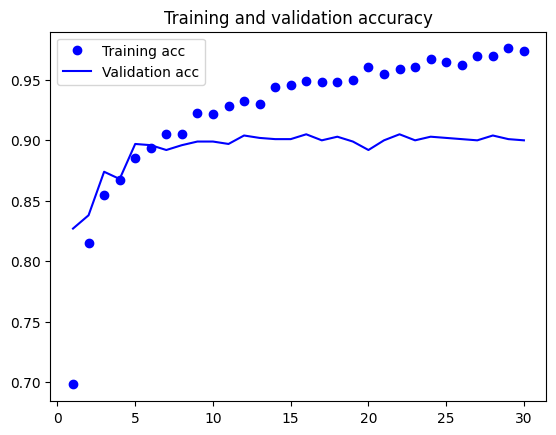

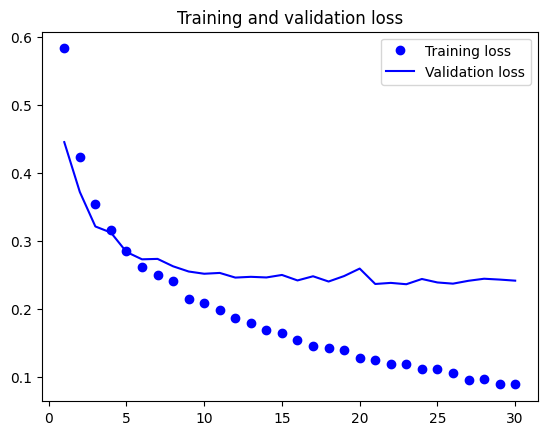

In [6]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title("Training and validation loss")
plt.legend()

plt.show()